In [ ]:
# General libraries
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## SVM Code and evaluation

In [ ]:
# time taken: 32 mins

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['scale']
}

# Create new SVC classifiers for each attack type
clf_SVM_DoS = SVC(random_state=0)
clf_SVM_DoS_features = SVC(random_state=0)
clf_SVM_Probe = SVC(random_state=0)
clf_SVM_Probe_features = SVC(random_state=0)
clf_SVM_R2L = SVC(random_state=0)
clf_SVM_R2L_features = SVC(random_state=0)
clf_SVM_U2R = SVC(random_state=0)
clf_SVM_U2R_features = SVC(random_state=0)

stratified_k_fold = StratifiedKFold(n_splits=5)

# Perform grid search cross-validation to find the best hyperparameters for each classifier
grid_search_DoS = GridSearchCV(clf_SVM_DoS, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_DoS_features = GridSearchCV(clf_SVM_DoS_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe = GridSearchCV(clf_SVM_Probe, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe_features = GridSearchCV(clf_SVM_Probe_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L = GridSearchCV(clf_SVM_R2L, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L_features = GridSearchCV(clf_SVM_R2L_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R = GridSearchCV(clf_SVM_U2R, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R_features = GridSearchCV(clf_SVM_U2R_features, param_grid, cv=stratified_k_fold, n_jobs=-1)

# Fit the classifiers on the training data
grid_search_DoS.fit(X_DoS, Y_DoS.astype(int))
grid_search_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
grid_search_Probe.fit(X_Probe, Y_Probe.astype(int))
grid_search_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
grid_search_R2L.fit(X_R2L, Y_R2L.astype(int))
grid_search_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
grid_search_U2R.fit(X_U2R, Y_U2R.astype(int))
grid_search_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Get the best hyperparameters for each classifier
best_params_DoS = grid_search_DoS.best_params_
best_params_DoS_features = grid_search_DoS_features.best_params_
best_params_Probe = grid_search_Probe.best_params_
best_params_Probe_features = grid_search_Probe_features.best_params_
best_params_R2L = grid_search_R2L.best_params_
best_params_R2L_features = grid_search_R2L_features.best_params_
best_params_U2R = grid_search_U2R.best_params_
best_params_U2R_features = grid_search_U2R_features.best_params_

# Print the best parameters
print("Best parameters for DoS classifier:", grid_search_DoS.best_params_)
print("Best parameters for DoS classifier with features:", grid_search_DoS_features.best_params_)
print("Best parameters for Probe classifier:", grid_search_Probe.best_params_)
print("Best parameters for Probe classifier with features:", grid_search_Probe_features.best_params_)
print("Best parameters for R2L classifier:", grid_search_R2L.best_params_)
print("Best parameters for R2L classifier with features:", grid_search_R2L_features.best_params_)
print("Best parameters for U2R classifier:", grid_search_U2R.best_params_)
print("Best parameters for U2R classifier with features:", grid_search_U2R_features.best_params_)

# Create new SVC classifiers with the best hyperparameters
clf_SVM_DoS = SVC(**best_params_DoS, random_state=0)
clf_SVM_DoS_features = SVC(**best_params_DoS_features, random_state=0)
clf_SVM_Probe = SVC(**best_params_Probe, random_state=0)
clf_SVM_Probe_features = SVC(**best_params_Probe_features, random_state=0)
clf_SVM_R2L = SVC(**best_params_R2L, random_state=0)
clf_SVM_R2L_features = SVC(**best_params_R2L_features, random_state=0)
clf_SVM_U2R = SVC(**best_params_U2R, random_state=0)
clf_SVM_U2R_features = SVC(**best_params_U2R_features, random_state=0)

# Fit the new classifiers on the training data
clf_SVM_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_SVM_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
clf_SVM_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_SVM_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
clf_SVM_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_SVM_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
clf_SVM_U2R.fit(X_U2R, Y_U2R.astype(int))
clf_SVM_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

Best parameters for DoS classifier: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for DoS classifier with features: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for Probe classifier: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for Probe classifier with features: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for R2L classifier: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for R2L classifier with features: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for U2R classifier: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for U2R classifier with features: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


SVC(C=0.1, kernel='linear', random_state=0)

### DoS Evaluation

In [ ]:
Y_DoS_pred=clf_SVM_DoS.predict(X_DoS_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for DoS:")
print(confusion_matrix)
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

Confusion Matrix for DoS:
Predicted attacks     0     1
Actual attacks               
0                  9518   193
1                  1186  6274
Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9711
           1       0.97      0.84      0.90      7460

    accuracy                           0.92     17171
   macro avg       0.93      0.91      0.92     17171
weighted avg       0.92      0.92      0.92     17171



### DoS Evaluation with feature selection

Confusion Matrix for DoS with feature selection:
Predicted attacks     0     1
Actual attacks               
0                  9174   537
1                  1832  5628
Accuracy: 0.8620348261603867


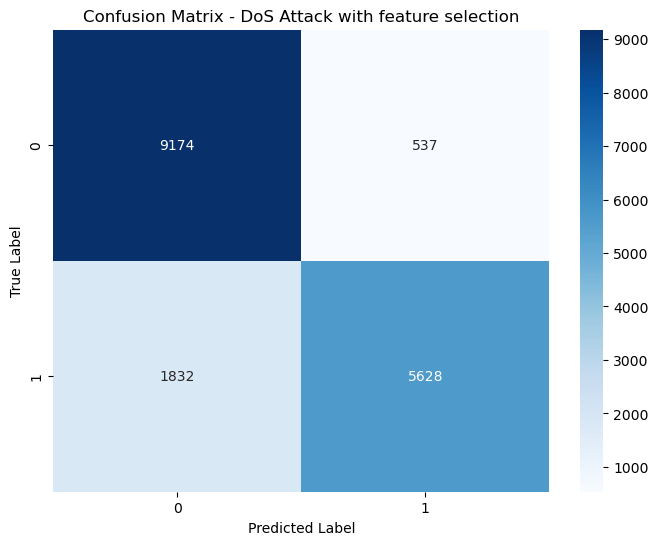

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      9711
           1       0.91      0.75      0.83      7460

    accuracy                           0.86     17171
   macro avg       0.87      0.85      0.86     17171
weighted avg       0.87      0.86      0.86     17171



In [ ]:
# Make predictions on the test set
Y_DoS_pred = clf_SVM_DoS_features.predict(X_newDoS_test)

# Create confusion matrix
cm_DoS = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print("Confusion Matrix for DoS with feature selection:")
print(cm_DoS)

# Calculate accuracy
accuracy_DoS = accuracy_score(Y_DoS_test, Y_DoS_pred)
print("Accuracy:", accuracy_DoS)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

### Probe prediction

In [ ]:
Y_Probe_pred=clf_SVM_Probe.predict(X_Probe_test)
# Create confusion matrix

confusion_matrix = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for Probe:")
print(confusion_matrix)
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

Confusion Matrix for Probe:
Predicted attacks     0     2
Actual attacks               
0                  8970   741
2                   645  1776
Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9711
           2       0.71      0.73      0.72      2421

    accuracy                           0.89     12132
   macro avg       0.82      0.83      0.82     12132
weighted avg       0.89      0.89      0.89     12132



### Probe prediction with feature selection

Confusion Matrix for Probe with feature selection:
Predicted attacks     0     2
Actual attacks               
0                  9283   428
2                  1157  1264
Accuracy: 0.8693537751401252


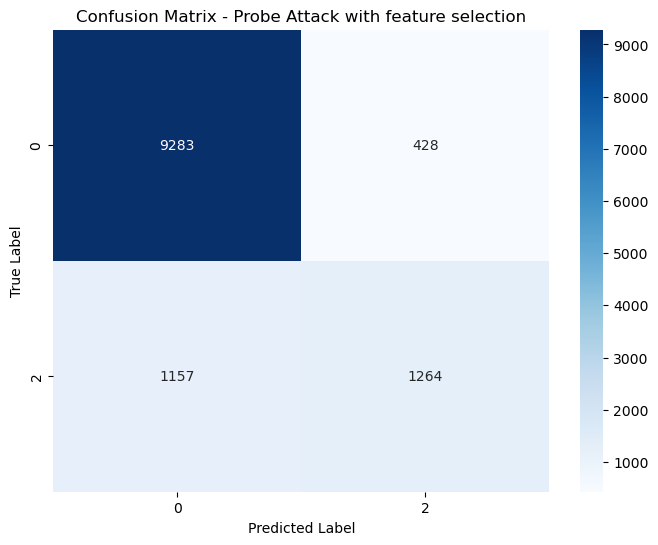

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      9711
           2       0.75      0.52      0.61      2421

    accuracy                           0.87     12132
   macro avg       0.82      0.74      0.77     12132
weighted avg       0.86      0.87      0.86     12132



In [ ]:
# Make predictions on the test set
Y_Probe_pred = clf_SVM_Probe_features.predict(X_newProbe_test)

# Create confusion matrix
cm_Probe = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print("Confusion Matrix for Probe with feature selection:")
print(cm_Probe)

# Calculate accuracy
accuracy_Probe = accuracy_score(Y_Probe_test, Y_Probe_pred)
print("Accuracy:", accuracy_Probe)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Probe, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

### R2L prediction

In [ ]:
Y_R2L_pred=clf_SVM_R2L.predict(X_R2L_test)
# Create confusion matrix
confusion_matrix = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for R2L:")
print(confusion_matrix)
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

Confusion Matrix for R2L:
Predicted attacks     0    3
Actual attacks              
0                  9678   33
3                  2733  152
Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      9711
           3       0.82      0.05      0.10      2885

    accuracy                           0.78     12596
   macro avg       0.80      0.52      0.49     12596
weighted avg       0.79      0.78      0.70     12596



### R2L prediction with feature selection

Confusion Matrix for R2L with feature selection:
Predicted attacks     0    3
Actual attacks              
0                  9686   25
3                  2508  377
Accuracy: 0.7989044140997142


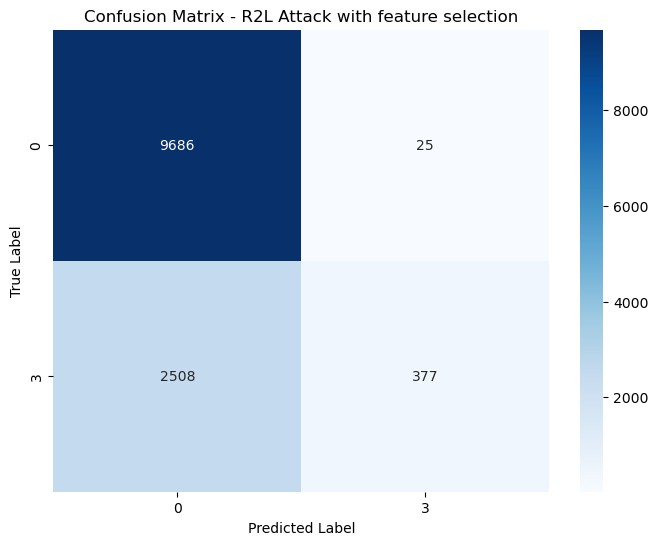

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9711
           3       0.94      0.13      0.23      2885

    accuracy                           0.80     12596
   macro avg       0.87      0.56      0.56     12596
weighted avg       0.83      0.80      0.73     12596



In [ ]:
# Make predictions on the test set
Y_R2L_pred = clf_SVM_R2L_features.predict(X_newR2L_test)

# Create confusion matrix
cm_R2L = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print("Confusion Matrix for R2L with feature selection:")
print(cm_R2L)

# Calculate accuracy
accuracy_R2L = accuracy_score(Y_R2L_test, Y_R2L_pred)
print("Accuracy:", accuracy_R2L)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_R2L, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

### U2R prediction

In [ ]:
Y_U2R_pred=clf_SVM_U2R.predict(X_U2R_test)
# Create confusion matrix
confusion_matrix = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for U2R:")
print(confusion_matrix)
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

Confusion Matrix for U2R:
Predicted attacks     0   4
Actual attacks             
0                  9704   7
4                    43  24
Classification Report for U2R:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.77      0.36      0.49        67

    accuracy                           0.99      9778
   macro avg       0.88      0.68      0.74      9778
weighted avg       0.99      0.99      0.99      9778



### U2R prediction with feature selection

Confusion Matrix for U2R with feature selection:
Predicted attacks     0
Actual attacks         
0                  9711
4                    67
Accuracy: 0.993147883002659


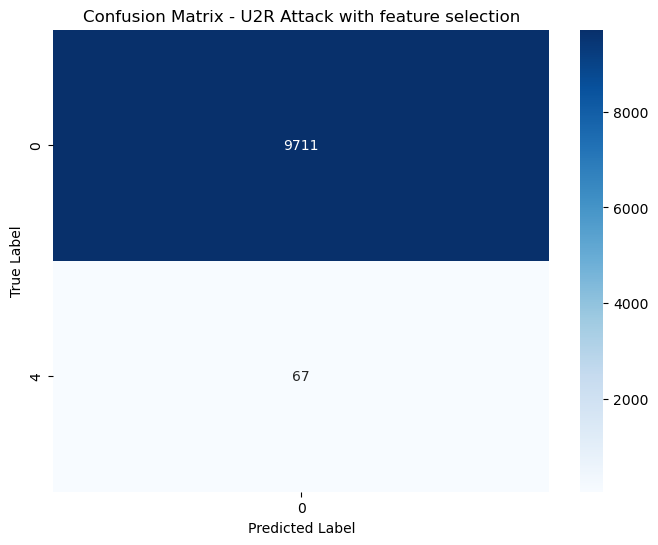

Classification Report for U2R:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.00      0.00      0.00        67

    accuracy                           0.99      9778
   macro avg       0.50      0.50      0.50      9778
weighted avg       0.99      0.99      0.99      9778



/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
# Make predictions on the test set
Y_U2R_pred = clf_SVM_U2R_features.predict(X_newU2R_test)

# Create confusion matrix
cm_U2R = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print("Confusion Matrix for U2R with feature selection:")
print(cm_U2R)

# Calculate accuracy
accuracy_U2R = accuracy_score(Y_U2R_test, Y_U2R_pred)
print("Accuracy:", accuracy_U2R)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_U2R, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))